<a href="https://colab.research.google.com/github/KU-ZHANGZIYUE/RainfallForecasting_ConvEncDec/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Convolutional Encoder Decoder Model
#Author: ZHANG Ziyue (Kyoto University)
#Date: 2011/11/3

from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Research/30mins_4ch

Mounted at /content/drive/
/content/drive/MyDrive/Research/30mins_4ch


In [2]:
import numpy as np
import os
from keras.models import *
from keras.layers import *
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
import random as rn

np.random.seed(42)
rn.seed(42)

In [3]:
def net():
    
    inputs = Input((192, 128, 4))

    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(conv1)

    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(conv2)
    

    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(conv3)
    
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(conv4)
    

    #drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(conv5)
    #drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(UpSampling2D(size = (2,2))(conv5))
    merge6 = concatenate([conv4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = initializers.glorot_normal(seed=0))(conv9)
    
    outputs = Conv2D(1, 1, activation='linear')(conv9)
    
    model = Model(inputs=inputs, outputs=outputs)

    return model

#然后validation改成20%，这个意思就是这最后20不会被用来traintrain
#然后挑选"validation"也就是最后20%的data中的几个sample，plot出来input，prediction和ground truth

In [ ]:
input = np.load('./paddedinput_30mins_4ch.npy')
output = np.load('./paddedoutput_30mins_4ch.npy')

model = net()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss='log_cosh', metrics=['accuracy'])
result = model.fit(input, output, epochs=100, validation_split=0.2)
model.save('Unet_30mins_4ch_100ep_nodrop_morefilter.h5')

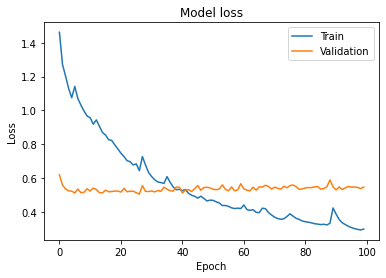

In [ ]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
#plt.ylim(-0.1, 0.2)
plt.show()

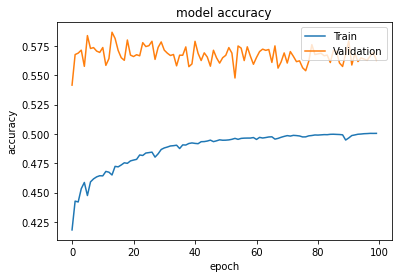

In [ ]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()